In [24]:
# Importar las librerias que necesitaré
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df0 = pd.read_csv('bk.txt', sep='\s+')

In [26]:
df0 = pd.read_csv("bk.txt", sep="\s+", skiprows=20, skipfooter=1, engine='python', 
                  names=['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin'])



In [27]:


# cambiamos la columna fecha a variable

df0['NFecha'] =  pd.to_datetime(df0['Fecha'], format='%d/%m/%Y')



In [28]:


df0.dtypes



Fecha             object
Precip            object
Evap              object
Tmax              object
Tmin              object
NFecha    datetime64[ns]
dtype: object

In [29]:


# cambiamos las columnas Precip, Evap, Tmax, Tmin a variables flotantes

df0[['Precip','Evap','Tmax','Tmin']] = df0[['Precip','Evap','Tmax','Tmin']] \
.apply(pd.to_numeric, errors='coerce')
df0 = df0.drop('Fecha', 1)
df0.dtypes



Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
NFecha    datetime64[ns]
dtype: object

In [30]:
# Crear columnas con Año y Mes extraídos de la columna fecha. 
df0['Año'] = df0['NFecha'].dt.year
df0['Mes'] = df0['NFecha'].dt.month
df0['DIA'] = df0['NFecha'].dt.day
df0['TDIF'] = (df0['Tmax'] - df0['Tmin'])
df0['TPROM'] = (df0['Tmax'] + df0['Tmin'])/2

df0.head(), df0.tail()

(   Precip  Evap  Tmax  Tmin     NFecha   Año  Mes  DIA  TDIF  TPROM
 0     0.0   2.9  29.0  22.0 1974-07-18  1974    7   18   7.0  25.50
 1     0.0   5.6  31.0  24.0 1974-07-19  1974    7   19   7.0  27.50
 2     0.0   NaN  31.5  24.0 1974-07-20  1974    7   20   7.5  27.75
 3     0.0   8.8  32.0  27.0 1974-07-21  1974    7   21   5.0  29.50
 4     0.0   7.2  32.0  27.0 1974-07-22  1974    7   22   5.0  29.50,
       Precip  Evap  Tmax  Tmin     NFecha   Año  Mes  DIA  TDIF  TPROM
 6613     0.0   9.4  34.0  24.0 2011-07-27  2011    7   27  10.0  29.00
 6614     0.0   7.0  33.5  24.5 2011-07-28  2011    7   28   9.0  29.00
 6615     0.0   7.6  33.0  25.5 2011-07-29  2011    7   29   7.5  29.25
 6616     0.0   8.1  36.0  25.5 2011-07-30  2011    7   30  10.5  30.75
 6617     0.0   NaN   NaN  27.5 2011-07-31  2011    7   31   NaN    NaN)

In [31]:
# Número de años distintos
NumA = len(df0['Año'].unique())
print(NumA, "años de datos")

24 años de datos


In [32]:


s=df0['Año'][0]
r=df0['Año'][len(df0)-1]



In [33]:
# días con heladas por año (FD: Tmin < 0ºC)
FD = []
años = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i and df0["Tmin"][j] < 0):
            numD = numD+1
            
            #print("En",i,"hay",numD,"dias helados")
    FD.append(numD)
    años.append(i)
    if(numD>0):
        print("En",i,"tenemos",numD,"dias frios.")
    numD = 0

En 1975 tenemos 1 dias frios.
En 1976 tenemos 2 dias frios.
En 1985 tenemos 2 dias frios.
En 1990 tenemos 3 dias frios.
En 2011 tenemos 2 dias frios.


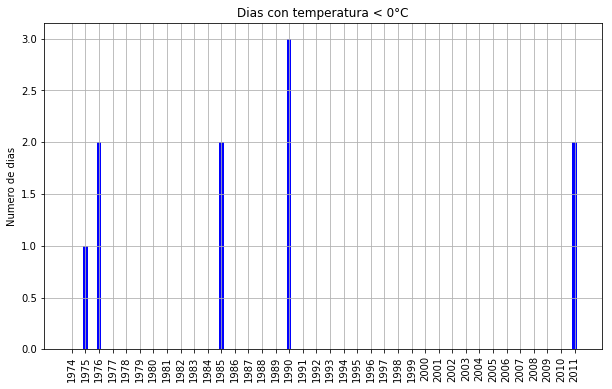

In [34]:


width = np.min(np.diff(años))/3
X=np.arange(len(años))
plt.figure(figsize = (10, 6))
plt.bar(X-width,FD,width,color='B')
plt.title("Dias con temperatura < 0°C")
plt.ylabel("Numero de dias")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()



In [35]:
#Número de días de verano por año (SU: Tmax > 25ºC).
DS = []
añoss = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i and df0["Tmax"][j] > 25):
            numD = numD+1
    DS.append(numD)
    añoss.append(i)
    if(numD>0):
        print("En",i,"tenemos",numD,"dias de verano.")
    numD = 0

En 1974 tenemos 115 dias de verano.
En 1975 tenemos 228 dias de verano.
En 1976 tenemos 245 dias de verano.
En 1977 tenemos 227 dias de verano.
En 1978 tenemos 141 dias de verano.
En 1979 tenemos 58 dias de verano.
En 1980 tenemos 212 dias de verano.
En 1981 tenemos 212 dias de verano.
En 1982 tenemos 191 dias de verano.
En 1983 tenemos 178 dias de verano.
En 1984 tenemos 195 dias de verano.
En 1985 tenemos 194 dias de verano.
En 1986 tenemos 119 dias de verano.
En 1988 tenemos 153 dias de verano.
En 1989 tenemos 84 dias de verano.
En 1990 tenemos 164 dias de verano.
En 1991 tenemos 175 dias de verano.
En 1992 tenemos 203 dias de verano.
En 1993 tenemos 205 dias de verano.
En 2007 tenemos 185 dias de verano.
En 2008 tenemos 125 dias de verano.
En 2010 tenemos 49 dias de verano.
En 2011 tenemos 86 dias de verano.


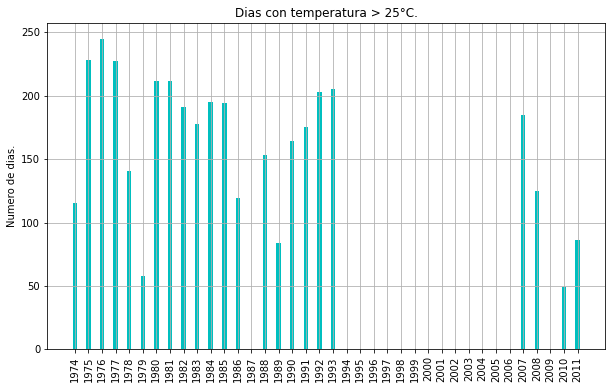

In [36]:
width = np.min(np.diff(años))/3
X=np.arange(len(añoss))
plt.figure(figsize = (10, 6))
plt.bar(X-width,DS,width,color='c')
plt.title("Dias con temperatura > 25°C.")
plt.ylabel("Numero de dias.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

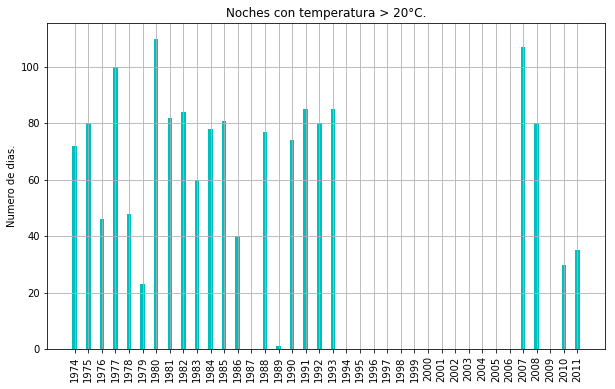

In [38]:
width = np.min(np.diff(años))/3
X=np.arange(len(años3))
plt.figure(figsize = (10, 6))
plt.bar(X-width,TR,width,color='c')
plt.title("Noches con temperatura > 20°C.")
plt.ylabel("Numero de dias.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

In [21]:
# Longitud de la estacion de cultivo por año ; GSL: periodo entre los primeros 6 dias seguidos del año
# Tpromedio mayor a 5 grados centigrados
# Los siguientes seis dias del año Tprom menor a  cinco grados centigrados
ltday = []
numD2 = -1
for i in range(r,s-1,-1):
    for j in range(len(df0),5,-1):
            if(df0["Año"][i-5] == j):
                if(df0["TPROM"][j-5] > 5 and df0["TPROM"][j-4] > 5 and df0["TPROM"][j-3] > 5 and
                   df0["TPROM"][j-2] > 5 and df0["TPROM"][j-1] > 5 and df0["TPROM"][j]   > 5):
                    numD2 = i
                    break
    if(numD != -1):
        ltday.append(numD2)
        numD2= -1
    else:
        ltday.append("NA")

In [39]:



#Longitud de la estación de cultivo por año (GSL: Periodo entre los primeros 6 días seguidos del año  Tprom > 5ºC, y los últimos 6 días seguidos del año con Tprom < 5ºC)
ftday = []
numD = -1
for i in range(s,r+1):
    for j in range(5,len(df0)):
            if(df0["Año"][i-5] == j):
                if(df0["TPROM"][j-5] > 5 and df0["TPROM"][j-4] > 5 and df0["TPROM"][j-3] > 5 and
                   df0["TPROM"][j-2] > 5 and df0["TPROM"][j-1] > 5 and df0["TPROM"][j]   > 5):
                    numD = i
                    break
    if(numD != -1):
        ftday.append(numD)
        numD= -1
    else:
        ftday.append("NA")






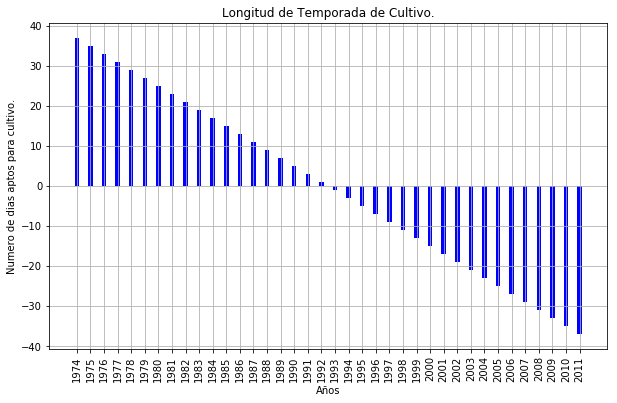

In [40]:


Ltc = []
for i in range(0,len(ltday)):
    if(ltday[i]!="NA" and ftday[i]!="NA"):
        Ltc.append(ltday[i]-ftday[i])
    if(ltday[i]=='NA'):
            Ltc.append( len(df0[df0['Año'] == s].index) )
    else:
        if(ftday[i]=='NA'):
            Ltc.append(0)
Ltc
width = np.min(np.diff(años))/3
X=np.arange(len(Ltc))
plt.figure(figsize = (10, 6))
plt.bar(X-width,Ltc,width,color='B')
plt.title("Longitud de Temporada de Cultivo.")
plt.ylabel("Numero de dias aptos para cultivo.")
plt.xlabel("Años")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()



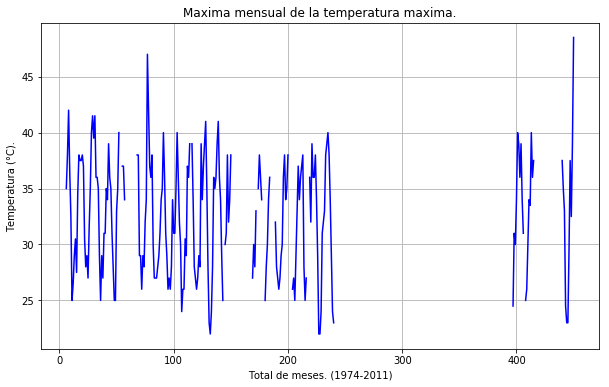

In [49]:


#TXx: temperatura máxima mensual de la temperatura minima
TXx = []
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        maxmens = df0_Mes.Tmax.max()
        TXx.append(maxmens)

plt.figure(figsize = (10, 6))
plt.plot(range(0,len(TXx)),TXx,color='B')
plt.title("Maxima mensual de la temperatura maxima.")
plt.ylabel("Temperatura (°C).")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()



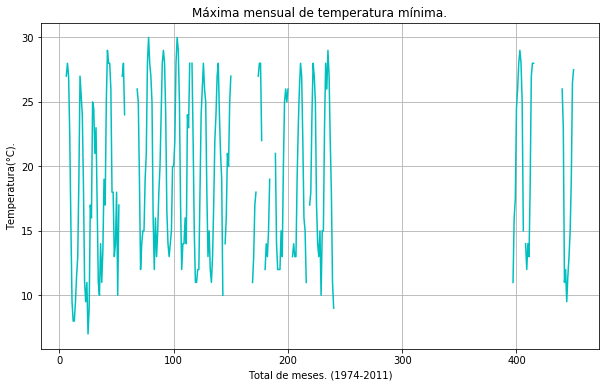

In [51]:

    

#TNx. La máxima mensual de la temperatura mínima, max(Tmin).
TNx = []
minmens=0
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        minmens = df0_Mes.Tmin.max()
        TNx.append(minmens)

plt.figure(figsize = (10, 6))
plt.plot(range(0,len(TNx)),TNx,color='c')
plt.title("Máxima mensual de temperatura mínima.")
plt.ylabel("Temperatura(°C).")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()



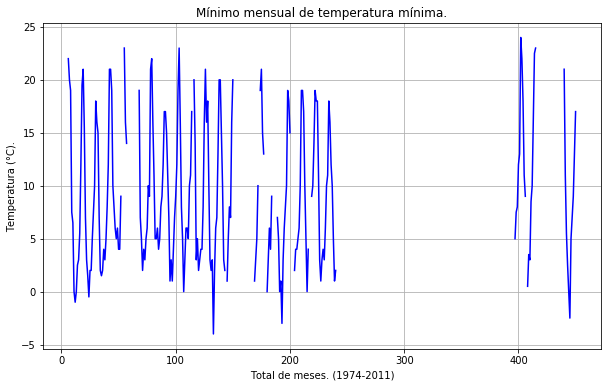

In [53]:


#TNn: El mínimo mensual de la temperatura mínima, min(Tmin).
TNn = []
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        minminmens = df0_Mes.Tmin.min()
        TNn.append(minminmens)


plt.figure(figsize = (10, 6))
plt.plot(range(0,len(TNn)),TNn,color='B')
plt.title("Mínimo mensual de temperatura mínima.")
plt.ylabel("Temperatura (°C).")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()



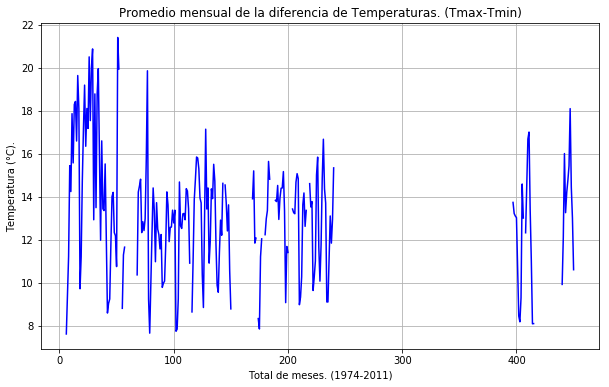

In [54]:


#DTR:  prom mensual de la diferencia de temperaturas (Tmax-Tmin). 
DTR = []
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        prom = df0_Mes.TDIF.mean()
        DTR.append(prom)
        
plt.figure(figsize = (10, 6))
plt.plot(range(0,len(DTR)),DTR,color='B')
plt.title("Promedio mensual de la diferencia de Temperaturas. (Tmax-Tmin)")
plt.ylabel("Temperatura (°C).")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()



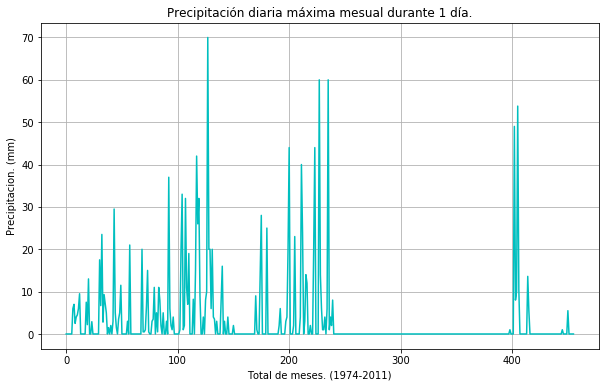

In [55]:


#Rx1day: Precipitación por dia máxima mensual en 1 día.  
Rx1day=[]
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        if(df0_Mes['Precip'].mean()!=0 and df0_Mes['Precip'].count()!=0):
            Rmaxid = df0_Mes['Precip'].idxmax()
            Rmax = df0_Mes['Precip'][Rmaxid]
            Rx1day.append(Rmax)
        else:  
            Rx1day.append(0.0)
            
plt.figure(figsize = (10, 6))
plt.plot(range(0,len(Rx1day)),Rx1day,color='c')
plt.title("Precipitación diaria máxima mesual durante 1 día.")
plt.ylabel("Precipitacion. (mm)")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()



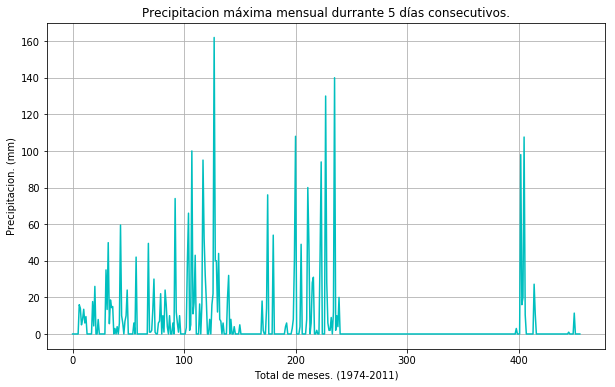

In [56]:


#Rx5 day: Precipitación diaria máxima mensual en cinco días consecutivos.
Rx5day=[]
safo=-1000
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        df0_Mes = df0_Mes.reset_index()
        if(df0_Mes['Precip'].mean()!=0 and df0_Mes['Precip'].count()!=0):
            for j in range (4,len(df0_Mes)):
                lluvia =(df0_Mes['Precip'][j-4]+df0_Mes['Precip'][j-3]+
                         df0_Mes['Precip'][j-3]+df0_Mes['Precip'][j-2]+
                         df0_Mes['Precip'][j])
                if (lluvia>safo):
                         safo=lluvia
            Rx5day.append(safo)
            safo=-1000
            #print(Rx5day)
        else:  
            Rx5day.append(0.0)
            
plt.figure(figsize = (10, 6))
plt.plot(range(0,len(Rx5day)),Rx5day,color='c')
plt.title("Precipitacion máxima mensual durrante 5 días consecutivos.")
plt.ylabel("Precipitacion. (mm)")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()



In [57]:


#SDII:  días en un año con precipitación mayor igual a 1mm.
MMMM = []
años12 = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i and df0["Precip"][j] == 1 ):
            numD = numD+1
    MMMM.append(numD)
    años12.append(i)
    if(numD>0):
        print("En",i,"tenemos",numD,"dias con precipitaciones de 1 mm.")
    numD = 0



En 1974 tenemos 1 dias con precipitaciones de 1 mm.
En 1975 tenemos 2 dias con precipitaciones de 1 mm.
En 1976 tenemos 1 dias con precipitaciones de 1 mm.
En 1977 tenemos 2 dias con precipitaciones de 1 mm.
En 1978 tenemos 2 dias con precipitaciones de 1 mm.
En 1979 tenemos 3 dias con precipitaciones de 1 mm.
En 1980 tenemos 2 dias con precipitaciones de 1 mm.
En 1981 tenemos 4 dias con precipitaciones de 1 mm.
En 1982 tenemos 5 dias con precipitaciones de 1 mm.
En 1983 tenemos 1 dias con precipitaciones de 1 mm.
En 1984 tenemos 5 dias con precipitaciones de 1 mm.
En 1986 tenemos 3 dias con precipitaciones de 1 mm.
En 1988 tenemos 1 dias con precipitaciones de 1 mm.
En 1990 tenemos 2 dias con precipitaciones de 1 mm.
En 1991 tenemos 3 dias con precipitaciones de 1 mm.
En 1992 tenemos 3 dias con precipitaciones de 1 mm.
En 1993 tenemos 5 dias con precipitaciones de 1 mm.
En 2007 tenemos 2 dias con precipitaciones de 1 mm.
En 2011 tenemos 2 dias con precipitaciones de 1 mm.


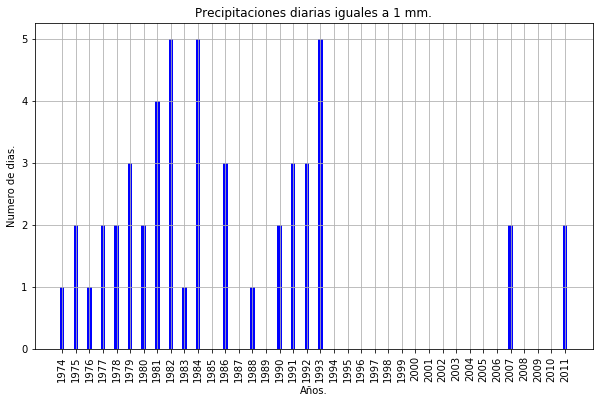

In [62]:



width = np.min(np.diff(años12))/3
X=np.arange(len(años12))
plt.figure(figsize = (10, 6))
plt.bar(X-width,MMMM,width,color='B')
plt.title("Precipitaciones diarias iguales a 1 mm.")
plt.ylabel("Numero de dias.")
plt.xlabel("Años.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()




In [63]:


#R20mm: días en el año con precipitación diaria mayor igual a 20mm.
R20mm = []
años14 = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i and df0["Precip"][j] > 20 ):
            numD = numD+1
    R20mm.append(numD)
    años14.append(i)
    if(numD>0):
        print("En",i,"tenemos",numD,"dias con precipitaciones mayores a 20 mm.")
    numD = 0



En 1976 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1977 tenemos 2 dias con precipitaciones mayores a 20 mm.
En 1978 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1981 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1982 tenemos 3 dias con precipitaciones mayores a 20 mm.
En 1983 tenemos 3 dias con precipitaciones mayores a 20 mm.
En 1984 tenemos 2 dias con precipitaciones mayores a 20 mm.
En 1988 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1989 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1990 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1991 tenemos 3 dias con precipitaciones mayores a 20 mm.
En 1992 tenemos 4 dias con precipitaciones mayores a 20 mm.
En 1993 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 2007 tenemos 2 dias con precipitaciones mayores a 20 mm.


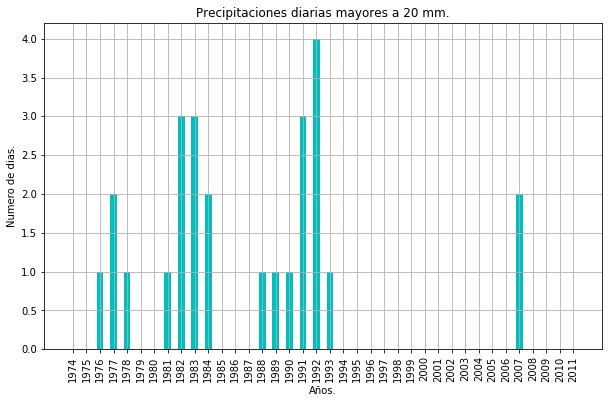

In [64]:
width = np.min(np.diff(años14))/2
X=np.arange(len(años14))
plt.figure(figsize = (10, 6))
plt.bar(X-width,R20mm,width,color='c')
plt.title("Precipitaciones diarias mayores a 20 mm.")
plt.ylabel("Numero de dias.")
plt.xlabel("Años.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

In [66]:


#CWD: días consecutivos húmedos, con precipitación igual o mayor a 1mm. 
CWD = []
años16 = []
numD = 0
safe = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i):
            if (df0["Precip"][j] >= 1):
                safe = safe+1
            elif (df0['Precip'][j] < 1):
                if(safe>numD):
                    numD=safe
                    safe=0
                else:
                    safe=0
                    
    CWD.append(numD)
    años16.append(i)
    if(numD>0):
        print("En",i,"tenemos un máximo de",numD,"dias lluviosos consecutivos.")
    numD = 0
    safe=0



En 1974 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1975 tenemos un máximo de 4 dias lluviosos consecutivos.
En 1976 tenemos un máximo de 3 dias lluviosos consecutivos.
En 1977 tenemos un máximo de 3 dias lluviosos consecutivos.
En 1978 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1979 tenemos un máximo de 3 dias lluviosos consecutivos.
En 1980 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1981 tenemos un máximo de 3 dias lluviosos consecutivos.
En 1982 tenemos un máximo de 3 dias lluviosos consecutivos.
En 1983 tenemos un máximo de 6 dias lluviosos consecutivos.
En 1984 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1985 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1986 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1988 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1989 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1990 tenemos un máximo de 4 dias lluviosos consecutivos.
En 1991 tenemos un máximo de 3 dias lluv

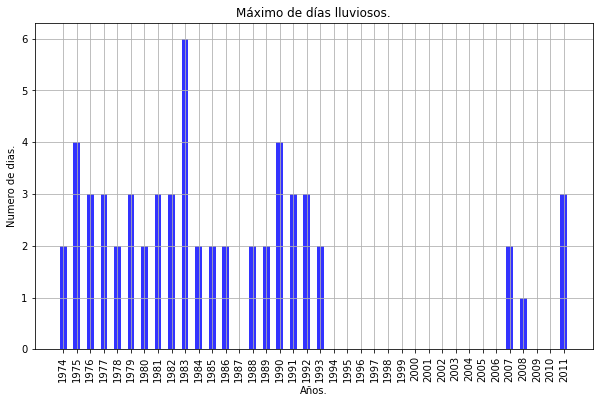

In [67]:


width = np.min(np.diff(años16))/2
X=np.arange(len(años16))
plt.figure(figsize = (10, 6))
plt.bar(X-width,CWD,width,alpha=0.8,color='B')
plt.title("Máximo de días lluviosos.")
plt.ylabel("Numero de dias.")
plt.xlabel("Años.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

